In [6]:
import random

n = 1 
N_in = 0
pi_list = []
pi2_list = []

"Je gooit random punten in een vierkant, telt hoeveel in de cirkel vallen, en gebruikt die verhouding om π te benaderen."
"Ntotaal / ​Nin ​​≈ Oppervlakte vierkant / Oppervlakte cirkel ​= 4π​"

while n < 10001:
  x = -1 + 2*random.random()
  y = -1 + 2*random.random()
  if x ** 2 + y ** 2 <= 1:
    N_in += 1
  pi = 4 * N_in / n
  pi2 = pi ** 2
  pi_list.append(pi)
  pi2_list.append(pi2)
  n += 1
  
mean_pi2 = sum(pi2_list) / n
mean_pi = sum(pi_list) / n
variance = n/(n-1)*(mean_pi2 - (mean_pi) ** 2)

pi = 4 * N_in / n
print(pi, variance)

3.1184881511848817 0.0035847719126505797


Vasicek model example

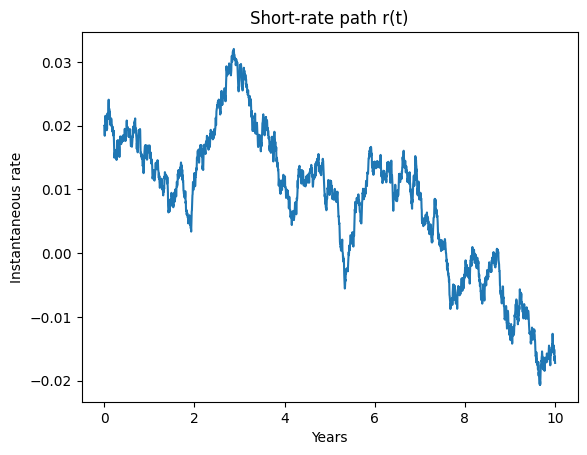

In [7]:
import numpy as np
import matplotlib.pyplot as plt

T, dt = 10, 1/252         # 10 years, daily steps
N = int(T/dt)
k, theta, sigma = 0.15, 0.03, 0.01
r = np.zeros(N); r[0] = 0.02

for t in range(1, N):
    dW = np.random.normal(0, np.sqrt(dt))
    r[t] = r[t-1] + k*(theta - r[t-1])*dt + sigma*dW

time = np.linspace(0, T, N)
plt.plot(time, r)
plt.title("Short-rate path r(t)")
plt.xlabel("Years"); plt.ylabel("Instantaneous rate")
plt.show()


In [8]:
import pandas as pd
import numpy as np

# --- Assumed Input Data Structure ---
# df_spot_rates: A DataFrame where index is date and columns are tenors (e.g., '1', '2', '5').

def calculate_forward_rate_changes(df_spot_rates: pd.DataFrame):
    """
    1. Converts ZCB spot rates to discrete forward rates.
    2. Calculates the daily change (rate of change) in these forward rates.
    """
    
    # Ensure column names are numeric (tenors in years) for calculation
    tenors = np.array([float(col) for col in df_spot_rates.columns])
    df_forward_rates = pd.DataFrame(index=df_spot_rates.index)
    
    # 1. The first forward rate (0 to T_min) is approximated by the first spot rate
    df_forward_rates[tenors[0]] = df_spot_rates.iloc[:, 0]
    
    # 2. Calculate forward rates for all other tenor buckets
    for i in range(1, len(tenors)):
        T1 = tenors[i-1]
        T2 = tenors[i]
        R1 = df_spot_rates.iloc[:, i-1]  # Spot rate for T1
        R2 = df_spot_rates.iloc[:, i]    # Spot rate for T2
        
        # Calculate the forward rate using the approximation formula
        forward_rate = (T2 * R2 - T1 * R1) / (T2 - T1)
        df_forward_rates[T2] = forward_rate
    
    # 3. Calculate the daily change (delta) in the forward rates
    # The .diff() function calculates the difference between the current row and the previous row.
    daily_rate_changes = df_forward_rates.diff().dropna()
    
    return daily_rate_changes



FILE_NAME = "yield-curve-rates-1990-2024.csv"

# Load the data: We assume the first column is the date and set it as the index.
# Tenors are typically in years and will be the column headers (e.g., '1', '5', '10').

    # Attempt to load, assuming common date formats and index structure
df_spot_rates = pd.read_csv(FILE_NAME, index_col=0, parse_dates=True)
    # The code below relies on the columns being strings representing years ('1', '5', '10', etc.)
df_spot_rates.columns = df_spot_rates.columns.astype(str)


# Execute Step 1
daily_rate_changes = calculate_forward_rate_changes(df_spot_rates)
print("--- Daily Forward Rate Changes (Head) ---")
print(daily_rate_changes.head())
print("\n")

FileNotFoundError: [Errno 2] No such file or directory: 'yield-curve-rates-1990-2024.csv'